In [1]:
!pip install --pre pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.2 

## pYCaret has capability to work with otherkind of data and other tasks to perform like classification, timesereies forecasting, anamoly detection, and text classification semtiment analaysis.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pycaret.datasets import get_data
from pycaret.regression import * #It will import every function that we have inside this regression class like load model, train and setup
mpl.rcParams['figure.dpi'] = 300 # To get visualization

In [3]:
data = get_data('insurance') # loading the data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Data based on features and they some charges

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [5]:
data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

I feel that smokers should be charged more than other non-smoker, so now we try train the model, which column showing impacts the model features

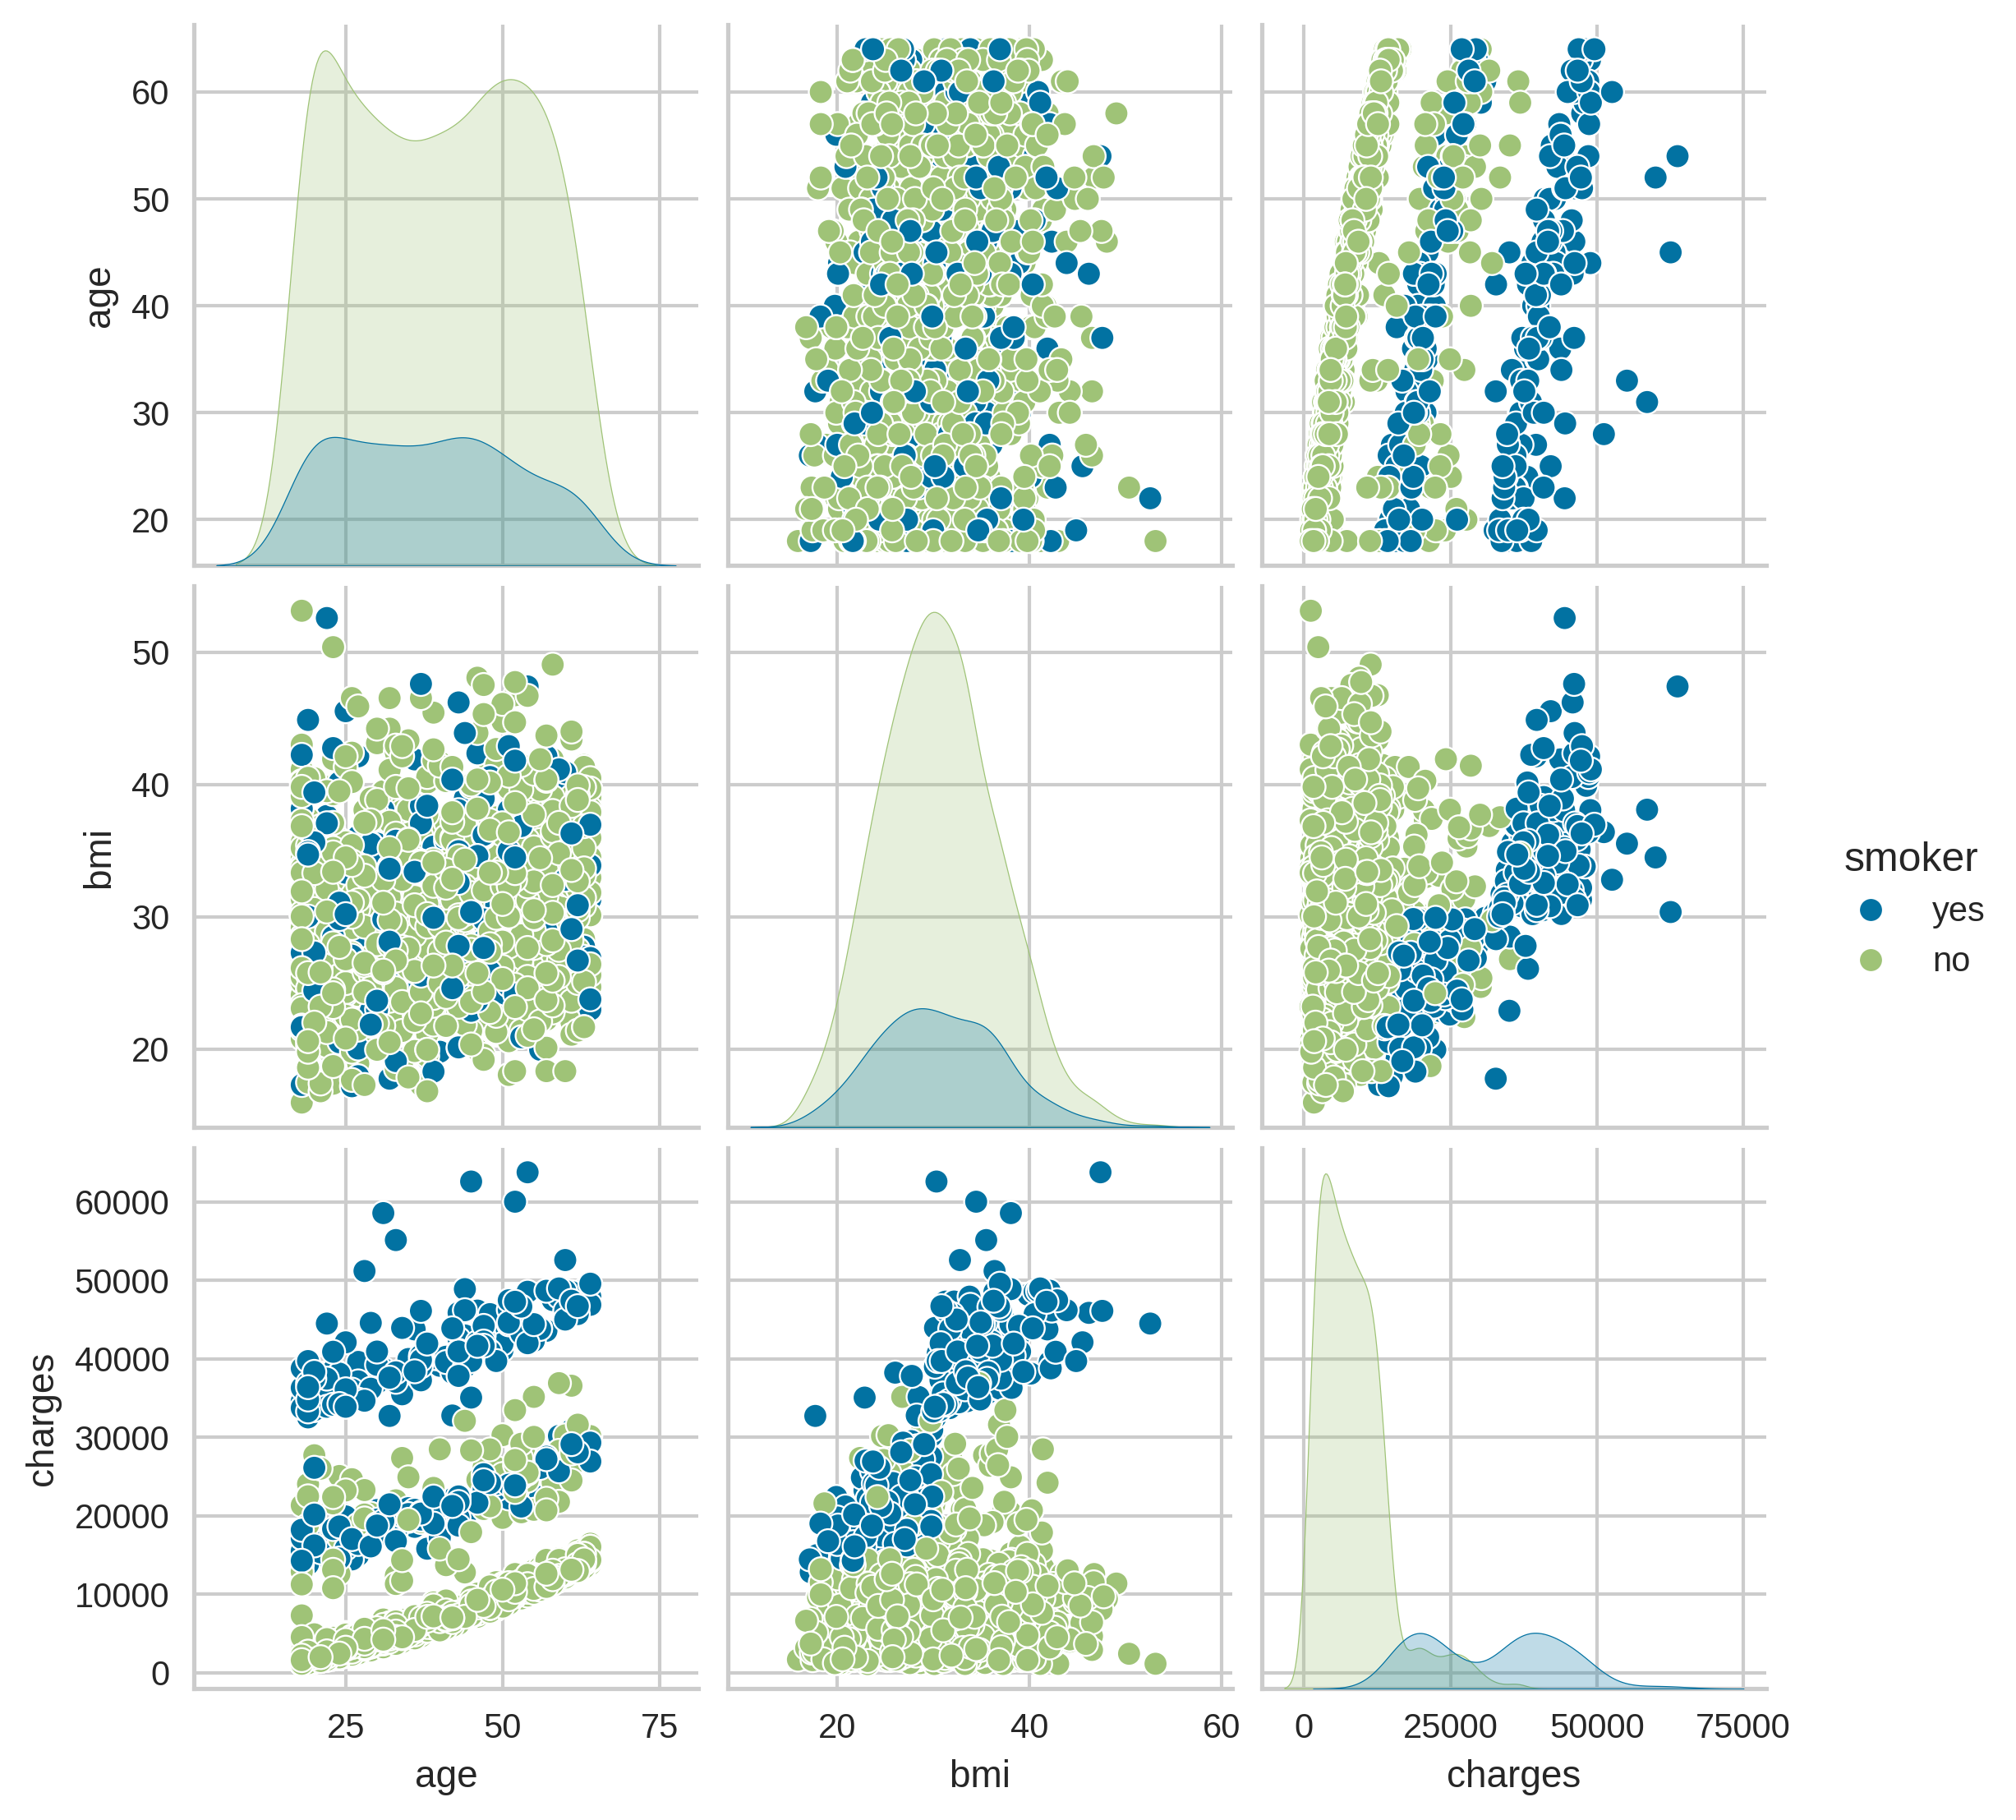

In [8]:
numeric = ['age', 'bmi', 'smoker', 'charges']
sns.pairplot(data[numeric], hue = 'smoker')
plt.show()

intilaizing pycaret environment

In [4]:
reg = setup(
    data = data,
    target = 'charges',
    train_size=0.8,
    session_id = 1144,
    normalize = True
)

,Description,Value
0,Session id,1144
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(1070, 10)"
6,Transformed test set shape,"(268, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


Train the model

In [5]:
best = compare_models(
    sort = 'RMSE'
)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2615.6557,22312485.0909,4664.3490,0.8418,0.4259,0.2969,0.1920
lightgbm,Light Gradient Boosting Machine,2884.5754,24496256.0386,4900.0807,0.8256,0.5516,0.3443,0.7840
rf,Random Forest Regressor,2785.2638,24950455.0222,4952.1244,0.8224,0.4563,0.3156,0.4880
et,Extra Trees Regressor,2787.7975,27372075.5281,5183.4415,0.8060,0.4616,0.3038,0.5220
ada,AdaBoost Regressor,4176.1575,28438904.4058,5307.8225,0.7975,0.5903,0.6557,0.1150
xgboost,Extreme Gradient Boosting,3132.0401,29017141.0000,5333.0211,0.7923,0.5494,0.3815,0.1930
knn,K Neighbors Regressor,3430.0486,31467769.6000,5571.7221,0.7785,0.4773,0.3539,0.1010
llar,Lasso Least Angle Regression,4285.4552,38019087.5416,6140.4118,0.7285,0.5671,0.4292,0.1690
lasso,Lasso Regression,4285.4919,38019102.4648,6140.4139,0.7285,0.5671,0.4292,0.0930
ridge,Ridge Regression,4286.7641,38020138.1813,6140.4559,0.7285,0.5671,0.4295,0.0930


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

model creating based upon best model

In [6]:
model = create_model('gbr', fold = 12)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2043.2396,14193878.2719,3767.4764,0.8737,0.3764,0.2894
1,2902.9437,26838637.3294,5180.6020,0.7801,0.4119,0.2571
2,2369.1893,17621284.3793,4197.7714,0.7811,0.4040,0.2239
3,2468.3334,18667051.9899,4320.5384,0.8984,0.3939,0.2848
4,1992.9265,18288449.7119,4276.4997,0.8756,0.3246,0.2338
5,2997.8426,25350946.9541,5034.9724,0.7990,0.4338,0.2923
6,2479.1389,15997865.5790,3999.7332,0.8548,0.4841,0.3440
7,2054.0845,15276464.3504,3908.5118,0.9199,0.3592,0.3066
8,2292.2303,19920000.1737,4463.1827,0.8734,0.3775,0.2600


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [7]:
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [8]:
predict_model(model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2504.6816,18262002.4998,4273.4064,0.8779,0.4470,0.3265


,age,sex,bmi,children,smoker,region,charges,prediction_label
299,48,female,28.879999,1,no,northwest,9249.495117,10525.060209
29,31,male,36.299999,2,yes,southwest,38711.000000,39645.516894
1043,28,female,25.799999,0,no,southwest,3161.454102,4704.627308
249,29,male,28.975000,1,no,northeast,4040.558350,6681.286638
107,26,male,30.875000,2,no,northwest,3877.304199,6349.220496
...,...,...,...,...,...,...,...,...
184,44,male,30.690001,2,no,southeast,7731.427246,9470.434077
88,46,female,27.740000,0,no,northwest,8026.666504,9798.017307
858,25,female,32.230000,1,no,southeast,18218.162109,4902.436266
797,30,female,22.895000,1,no,northeast,4719.523926,6402.668212


fine tuning the model

In [9]:
params = {
    'learning_rate' : [0.01, 0.02, 0.05],
    'max_depth' : [1, 2, 3, 4, 5, 6, 7, 8],
    'subsample' : [0.5, 0.6, 0.7, 0.8],
    'n_estimators' : [100, 200, 300, 400, 500, 600]
}

In [10]:
tuned_model = tune_model(
    model,
    optimize = 'RMSE',
    fold = 12,
    custom_grid = params,
    n_iter = 10
)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1991.9417,13603468.1389,3688.2880,0.8789,0.3703,0.2764
1,2904.4017,26598394.8697,5157.3632,0.7820,0.4283,0.2663
2,2646.4851,19454207.1568,4410.6924,0.7583,0.4179,0.2502
3,2468.8189,19113991.4893,4371.9551,0.8960,0.3869,0.2799
4,2000.2539,17443226.1019,4176.5088,0.8814,0.3204,0.2366
5,2996.1338,25630748.2481,5062.6819,0.7968,0.4388,0.2976
6,2232.5080,14807086.5060,3847.9977,0.8656,0.4317,0.2715
7,2081.9524,14636534.2721,3825.7724,0.9233,0.3517,0.3021
8,2168.2564,19086332.1980,4368.7907,0.8787,0.3773,0.2612


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 12 folds for each of 10 candidates, totalling 120 fits


Save the model


In [11]:
final_model = finalize_model(model)
save_model(final_model, 'insurance_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['sex', 'smoker'],
                                     transfor...
                                                                         {'col': 'smoker',
                                                                          'data_type': dtype('O'),
                                                                          'mapping': no     0
 yes    1
 NaN   -1
 dtype: int64}]))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['region'],
    